### Определение перспективного тарифа для телеком компании  
___
##### Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
___
###### Данное исследование разделим на несколько шагов. 

#### Шаг 1. Загрузка данных, изучение общей информации, подготовка данных: 
* [1.1. Загрузка библиотек, открытие и сохранение файла](#1-bullet)
* [1.2. Получение и рассмотрение общей информации о таблице](#2-bullet)

#### Шаг 2. Предобработка данных: 
* [2.1. Замена типов данных](#3-bullet)
* [2.2. Исправление ошибок в данных](#4-bullet)
* [2.3. Дополнительные расчеты](#5-bullet)

#### Шаг 3. Анализ данных: 
* [3.1. Средние показатели по тарифам](#6-bullet)
* [3.2. Описательные статистики](#7-bullet)
* [3.3. Гистограммы](#8-bullet)

#### Шаг 4. Проверка гипотез:
* [4.1.Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#9-bullet)
* [4.2.Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#10-bullet)

#### Шаг 5. Общий вывод:
* [5.1.Общий вывод](#11-bullet)

### Шаг 1. Загрузка данных, изучение общей информации, подготовка данных:

<a id='1-bullet'></a>
#### 1.1. Загрузка библиотек, открытие и сохранение файла

In [1]:
# импортируем необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

# открываем и сохраняем файлы
users = pd.read_csv('/datasets/users.csv', sep=',')
tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
calls = pd.read_csv('/datasets/calls.csv', sep=',')
internet = pd.read_csv('/datasets/internet.csv', sep=',')
messages = pd.read_csv('/datasets/messages.csv', sep=',')

<a id='2-bullet'></a>
#### 1.2. Получение и рассмотрение общей информации о таблице

In [2]:
# рассмотрим общую информацию о таблице users
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В таблице `users` представлена информация о клиентах компании "Мегалайн".  

Столбцы:  
  - **user_id** - уникальный идентификатор пользователя  
  - **age** - возраст пользователя  
  - **churn_date** - дата прекращения пользования тарифом  
  - **city** - город проживания пользователя  
  - **first_name** - имя пользователя  
  - **last_name** - фамилия пользователя  
  - **reg_date** - дата подключения тарифа  
  - **tariff** - название тариффного плана 

In [3]:
# рассмотрим общую информацию о таблице tariffs
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице `tariffs` представлено описание действующих тариффов компании "Мегалайн".

Столбцы:  
  - **tariff_name** — название тарифа  
  - **rub_monthly_fee** — ежемесячная абонентская плата в рублях  
  - **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату  
  - **messages_included** — количество сообщений в месяц, включённых в абонентскую плату  
  - **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату  
  - **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета 
  - **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета  
  - **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета  

In [4]:
# рассмотрим общую информацию о таблице calls
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


В таблице `calls` содержится информация о звонках за последний месяц.

Столбцы:   
  - **id** — уникальный номер звонка  
  - **call_date** — дата звонка  
  - **duration** — длительность звонка в минутах  
  - **user_id** — идентификатор пользователя, сделавшего звонок

In [5]:
# рассмотрим общую информацию о таблице internet
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


В таблице `internet` содержится информация о звонках за последний месяц.

Столбцы:   
  - **id** — уникальный номер сессии  
  - **mb_used** — объём потраченного за сессию интернет-трафика   
  - **session_date** — дата интернет-сессии  
  - **user_id** — идентификатор пользователя  

In [6]:
# рассмотрим общую информацию о таблице messages
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


В таблице `messages` содержится информация о звонках за последний месяц.

Столбцы:   
  - **id** — уникальный номер сообщения  
  - **message_date** — дата сообщения  
  - **user_id** — идентификатор пользователя, отправившего сообщение  

### Шаг 2. Предобработка данных

<a id='3-bullet'></a>
#### 2.1. Замена типов данных

In [7]:
# Заменяем тип данных со строчного на временной 
users['reg_date']=pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users['churn_date']=pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
calls['call_date']=pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
internet['session_date']=pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
messages['message_date']=pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

<a id='4-bullet'></a>
#### 2.2. Исправление ошибок в данных

##### Звонки (таблица calls)

In [8]:
# Посчитаем сколько всего звонков с нулевой длительностью
print('Количество звонков с нулевой длительностью', calls.loc[calls['duration']==0, 'duration'].value_counts()[0])

Количество звонков с нулевой длительностью 39613


In [9]:
# Создаем столбец с номером месяца
calls['month']=calls['call_date'].dt.month

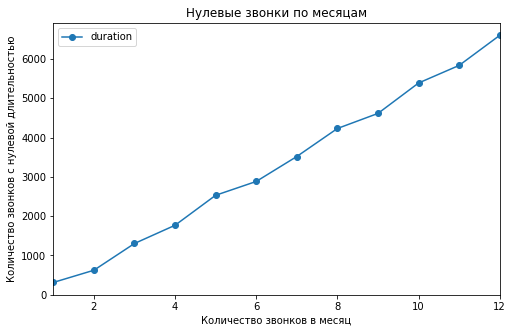

In [10]:
# Посмотрим как распределяются нулевые звонки по месяцам
(calls
     .query('duration == 0')
     .pivot_table(index='month', values='duration', aggfunc='count')
     .plot(grid=False, figsize=(8,5), xlim=(1,12), style='o-')
)
plt.xlabel('Количество звонков в месяц')
plt.ylabel('Количество звонков с нулевой длительностью')
plt.title('Нулевые звонки по месяцам')
plt.show()

Количество нулевых звонков увеличивается с каждым месяцем, можно предположить, что это не случайные значения, а неккоректно обработанные звонки длительностью меньше 1 минуты.  

Далее, звонки с длительностью 0 минут на 1, а также округлим вверх все текущие значения минут. 

In [11]:
calls.loc[calls['duration']==0, 'duration'] = 1
calls['duration'] = calls['duration'].apply(np.ceil)

##### Интернет (таблица internet)

In [12]:
#  Посчитаем сколько всего нулевых интернет-сессий
print('Количество нулевых интернет-сессий', internet.loc[internet['mb_used']==0, 'mb_used'].value_counts()[0])

Количество нулевых интернет-сессий 19598


In [13]:
# Создаем столбец с номером месяца
internet['month']=internet['session_date'].dt.month

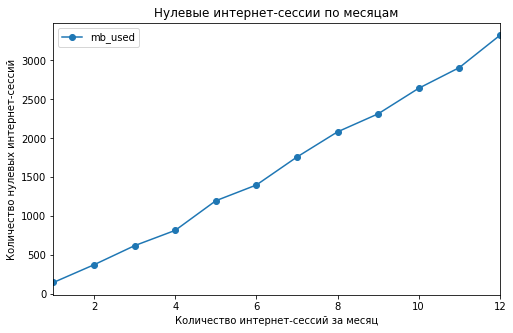

In [14]:
# Посмотрим как распределяются нулевые звонки по месяцам
(internet
     .query('mb_used == 0')
     .pivot_table(index='month', values='mb_used', aggfunc='count')
     .plot(grid=False, figsize=(8,5), xlim=(1,12), style='o-')
)
plt.xlabel('Количество интернет-сессий за месяц')
plt.ylabel('Количество нулевых интернет-сессий')
plt.title('Нулевые интернет-сессии по месяцам')
plt.show()

Можно заметить схожую ситуацию как с звонками - количество нулевых интернет-сессий растет с каждым месяцем. 

Далее, заменим нулевые интернет-сессии на 1 мб, а остальные значения округлим вверх.

In [15]:
internet.loc[internet['mb_used']==0, 'mb_used'] = 1
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

<a id='5-bullet'></a>
#### 2.3. Дополнительные расчеты
Для каждого пользователя найдем следующее:  
 - количество сделанных звонков и израсходованных минут разговора по месяцам;  
 - объем израсходованного интернет-трафика по месяцам;    
 - количество отправленных сообщений по месяцам;  

In [16]:
# Находим количество сделанных звонков и израсходаванных минутов по месяцам
calls_grouped = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum','count'])
calls_grouped.columns = ['duration', 'calls']
calls_grouped

duration  calls
user_id month                 
1000    5         164.0     22
        6         187.0     43
        7         346.0     47
        8         418.0     52
        9         478.0     58
...                 ...    ...
1498    10        258.0     41
1499    9          71.0      9
        10        473.0     68
        11        624.0     74
        12        505.0     69

[3174 rows x 2 columns]

In [17]:
# находим объем израсходованного траффика для каждого пользователя по месяцам
internet_grouped = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_grouped

mb_used
user_id month         
1000    5       2257.0
        6      23262.0
        7      14017.0
        8      14072.0
        9      14583.0
...                ...
1498    10     20614.0
1499    9       1849.0
        10     17824.0
        11     17994.0
        12     13082.0

[3203 rows x 1 columns]

In [18]:
# создаем столбец с номером месяца
messages['month']=messages['message_date'].dt.month

# находим количество сообщений для каждого пользователя по месяцам
messages_grouped = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
messages_grouped.columns = ['messages']
messages_grouped

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

In [19]:
# объединяем звонки, объем трафика и сообщения
grouped_data = pd.merge(calls_grouped, internet_grouped, on=['user_id', 'month'], how='outer')
grouped_data = grouped_data.merge(messages_grouped, on=['user_id', 'month'], how='outer')
grouped_data.sort_values(by='user_id')

duration  calls  mb_used  messages
user_id month                                    
1000    5         164.0   22.0   2257.0      22.0
        6         187.0   43.0  23262.0      60.0
        7         346.0   47.0  14017.0      75.0
        8         418.0   52.0  14072.0      81.0
        9         478.0   58.0  14583.0      57.0
...                 ...    ...      ...       ...
1498    9         477.0   59.0  22186.0      44.0
1499    9          71.0    9.0   1849.0      11.0
        10        473.0   68.0  17824.0      48.0
        11        624.0   74.0  17994.0      59.0
        12        505.0   69.0  13082.0      66.0

[3214 rows x 4 columns]

Далее, рассчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [20]:
# заменим пропуски на нули
grouped_data.loc[grouped_data['duration'].isna(), 'duration'] = 0
grouped_data.loc[grouped_data['calls'].isna(), 'calls'] = 0
grouped_data.loc[grouped_data['mb_used'].isna(), 'mb_used'] = 0
grouped_data.loc[grouped_data['messages'].isna(), 'messages'] = 0

# добавим название используемого пользователем тарифа
for user in grouped_data.index:
    grouped_data.loc[user, 'tariff']=users.loc[user[0]-1000, 'tariff']

# функция подсчета выручки для каждого пользователя
def det_revenue(row):
    calls = row['calls']
    duration = row['duration']
    mb_used = row['mb_used']
    messages = row['messages']
    tariff = row['tariff']
    
    if tariff =='smart':
        duration_extra = duration - tariffs.loc[0, 'minutes_included']
        mb_extra = mb_used - tariffs.loc[0, 'mb_per_month_included']
        messages_extra = messages - tariffs.loc[0, 'messages_included']
        
        if duration_extra < 0: duration_extra=0
        if mb_extra < 0: mb_extra=0
        if messages_extra < 0: messages_extra=0    
        
        return (duration_extra * tariffs.loc[0,'rub_per_minute'] + 
                mb_extra*(tariffs.loc[0, 'rub_per_gb']/1024)+
                messages_extra*tariffs.loc[0, 'rub_per_message']+ tariffs.loc[0,'rub_monthly_fee'])
    
    else:
        duration_extra = duration - tariffs.loc[1, 'minutes_included']
        mb_extra = mb_used - tariffs.loc[1, 'mb_per_month_included']
        messages_extra = messages - tariffs.loc[1, 'messages_included']
        
        if duration_extra < 0: duration_extra=0
        if mb_extra < 0: mb_extra=0
        if messages_extra < 0: messages_extra=0    
        
        return (duration_extra * tariffs.loc[1,'rub_per_minute'] + 
                mb_extra*(tariffs.loc[1, 'rub_per_gb']/1024)+
                messages_extra*tariffs.loc[1, 'rub_per_message']+ tariffs.loc[1,'rub_monthly_fee'])

grouped_data['revenue']=grouped_data.apply(det_revenue, axis=1)

grouped_data.head(10)

duration  calls  mb_used  messages tariff     revenue
user_id month                                                       
1000    5         164.0   22.0   2257.0      22.0  ultra  1950.00000
        6         187.0   43.0  23262.0      60.0  ultra  1950.00000
        7         346.0   47.0  14017.0      75.0  ultra  1950.00000
        8         418.0   52.0  14072.0      81.0  ultra  1950.00000
        9         478.0   58.0  14583.0      57.0  ultra  1950.00000
        10        363.0   57.0  14717.0      73.0  ultra  1950.00000
        11        344.0   43.0  14769.0      58.0  ultra  1950.00000
        12        341.0   46.0   9829.0      70.0  ultra  1950.00000
1001    11        444.0   59.0  18460.0       0.0  smart  1155.46875
        12        430.0   63.0  14059.0       0.0  smart   550.00000

### Шаг 3. Анализ данных

<a id='6-bullet'></a>
#### 3.1. Средние показатели по тарифам

Посчитаем сколько каждому пользователю в среднем в месяц требуется минут разговора, сообщений и объема траффика.

In [21]:
# посчитаем медианные значения минут разговора, сообщений и объема траффика для каждого пользователя
medians = grouped_data.pivot_table(index='user_id',values=['duration','messages','mb_used'], aggfunc='median')
medians

# добавим к таблице medians тарифф пользователя
for user_id in users['user_id']:
    medians.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']

medians.head()

,duration,mb_used,messages,tariff
user_id,,,,
1000,345.0,14327.5,65.0,ultra
1001,437.0,16259.5,0.0,smart
1002,221.0,17615.0,11.0,smart
1003,844.0,11369.0,83.0,ultra
1004,136.5,17831.0,154.5,ultra


<a id='7-bullet'></a>
#### 3.2. Описательные статистики

In [22]:
# посчитаем описательные статистики (медиану, дисперсию и стандартное отклонение)
descriptive_stat = medians.pivot_table(index='tariff', values=['duration', 'mb_used', 'messages'], aggfunc={'duration':[np.median, np.var, np.std],
                                                                                                              'mb_used':[np.median, np.var, np.std],
                                                                                                              'messages':[np.median, np.var, np.std]})
descriptive_stat

duration                             mb_used               \
         median         std           var    median          std   
tariff                                                             
smart     453.0  164.614327  27097.876586  16955.00  4181.498288   
ultra     550.5  311.491491  97026.949014  19751.75  8901.975727   

                     messages                          
                 var   median        std          var  
tariff                                                 
smart   1.748493e+07     28.5  28.010653   784.596662  
ultra   7.924517e+07     47.5  49.236809  2424.263318

Можно заметить, что количество минут, сообщений и объем траффика у пользователей тарифа "Ультра" имеет бОльшую медиану и дисперсию по сравнению с пользователями тарифа "Смарт".

<a id='8-bullet'></a>
#### 3.3. Гистограммы

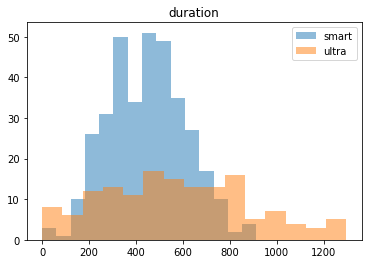

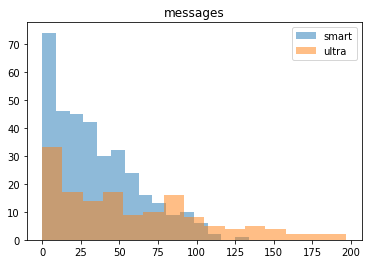

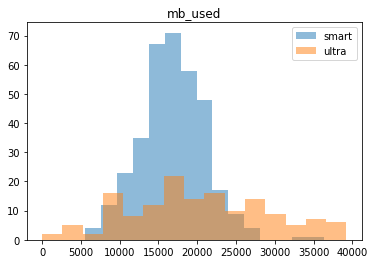

In [23]:
# построим гистограммы для минут разговора, количества сообщений и объема траффика для "среднего" месяца
for column in ['duration', 'messages','mb_used']:
    medians[medians['tariff']=='smart'][column].hist(bins=15, alpha=0.5, grid=False, label='smart')
    medians[medians['tariff']=='ultra'][column].hist(bins=15, alpha=0.5, grid=False, label='ultra')
    plt.legend(loc='upper right')
    plt.title(column)
    plt.show()

По гистаграммам хорошо видно, что дисперсия у пользователей тарифа "Ультра" выше по всем показателям: по минутам разговора, по количеству сообщений, по объему используемого траффика.  
Можно сделать вывод, что поведение пользователей тарифа "Ультра" более разнообразно в сравнении с поведением пользователей тарифа "Смарт". Они более свободны в выборе как им использовать объемы своего тарифного плана, в то время как у пользователей тарифа "Смарт" формируется некое схожее "шаблонное" потребление (возможно из-за того, что им чаще приходится держать в голове информацию об объемах их тарифного плана). 

### Шаг 4. Проверка гипотез

<a id='9-bullet'></a>
#### 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
H0 = средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт"  
H1 = средняя выручка пользователей тарифов "Ультра" и "Смарт" различается  
α = 1%

In [24]:
# выделяем пользователей тарифов в отдельную переменную
ultra = grouped_data.query('tariff == "ultra"')['revenue']
smart = grouped_data.query('tariff == "smart"')['revenue']

alpha = .01

# проверка гипотезы
results = st.ttest_ind(
    ultra,
    smart,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.4535744400867116e-281
Отвергаем нулевую гипотезу


In [25]:
# Посчитаем среднюю выручку пользователей тарифов
grouped_data.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,987.664062
ultra,1950.000000


По итогам теста мы отвергаем нулевую гипотезу о том, что средняя выручка пользователей тарифов "Ультра" и "Смарт" равна.  Соответственно мы вынуждены принять альтернативную гипотезу: средняя выручка пользователей тарифов "Ультра" и "Смарт" различается с вероятностью 99%.  

Если посмотреть на медианные значения, то мы видим, что средняя выручка пользователей тарифа "Ультра" почти в 2 раза превышает среднюю выручку тарифа "Смарт". Также можно отметить, что пользователям тарифа "Смарт" обычно не хватает объема тариффного плана, поэтому их средняя выручка выше установленной абонентской платы за тариф. 

<a id='10-bullet'></a>
#### 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
H0 = средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов  
H1 = средняя выручка пользователей из Москвы и регионов различается  
α = 1%

In [26]:
# добавим название города к grouped_data
for user in grouped_data.index:
    grouped_data.loc[user, 'city'] = users.loc[user[0]-1000, 'city']
grouped_data

duration  calls  mb_used  messages tariff      revenue  \
user_id month                                                           
1000    5         164.0   22.0   2257.0      22.0  ultra  1950.000000   
        6         187.0   43.0  23262.0      60.0  ultra  1950.000000   
        7         346.0   47.0  14017.0      75.0  ultra  1950.000000   
        8         418.0   52.0  14072.0      81.0  ultra  1950.000000   
        9         478.0   58.0  14583.0      57.0  ultra  1950.000000   
...                 ...    ...      ...       ...    ...          ...   
1489    8           0.0    0.0  11072.0      17.0  smart   550.000000   
        9           0.0    0.0  17246.0      32.0  smart   918.359375   
        10          0.0    0.0  19599.0      21.0  smart  1377.929688   
        11          0.0    0.0  17526.0      20.0  smart   973.046875   
        12          0.0    0.0  17349.0      35.0  smart   938.476562   

                          city  
user_id month                   
1000    5            Краснодар  
        6            Краснодар  
        7            Краснодар  
        8            Краснодар  
        9            Краснодар  
...                        ...  
1489    8      Санкт-Петербург  
        9      Санкт-Петербург  
        10     Санкт-Петербург  
        11     Санкт-Петербург  
        12     Санкт-Петербург  

[3214 rows x 7 columns]

In [27]:
# выделяем жителей регионов в соответствующие переменные
moscow = grouped_data.query('city == "Москва"')['revenue']
regions = grouped_data.query('city != "Москва"')['revenue']

alpha = .01

# проверка гипотезы
results = st.ttest_ind(
    moscow,
    regions,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5030013194608627
Не получилось отвергнуть нулевую гипотезу


In [28]:
# напишем функцию для определения региона
def det_region(city):
    if city == 'Москва': return 'Москва'
    else: return 'Другой регион'

# добавим новый столбец с регионом
grouped_data['region']=grouped_data['city'].apply(det_region)        

# посчитаем медианные значения выручки в регионах
grouped_data.pivot_table(index='region', values='revenue', aggfunc='median')

,revenue
region,
Другой регион,1545.898438
Москва,1733.593750


Нулевую гипотезу не получилось отвергнуть, а это означает, что с вероятностью 99% средняя выручка пользователей Москвы и других регионов равна.  
Так, если посмотреть на медианные значения выручки Москвы и других регионов, то они действительно практически не отличаются друг от друга. 

### Шаг 5. Общий вывод

<a id='11-bullet'></a>
#### Общий вывод:

По результатам статистического анализа доходы от тарифа "Ультра" различаются в сравнении с тарифом "Смарт" с вероятностью 99%.    
Средняя выручка от пользователей тарифа "Ультра" почти в 2 раз превышает выручку от пользователей тарифа "Смарт" (1950 рублей против 988 рублей соответственно).  
В свою очередь, средняя выручка от пользователей в Москве и пользователей в регионах статистически не различается.  

Особенности использования тарифов:  
 - пользователям тарифа "Смарт" не хватает установленных в тарифе объемов. В среднем пользователи покупают дополнительные услуги еще на 438 рублей ежемесячно. 
 - в тарифе "Ультра" обратная ситуация. Пользователи не могут использовать весь объем тарифа. Возможно стоит внимательнее изучить использование пользователями минут, сообщений и мегабайтов внутри тарифа, чтобы как-то его модернизировать.  